# Genre Analysis for Project 
-----------------------------


In [43]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import YearLocator





In [44]:
# read in cleaned dataframe csv
movies = "output/Final_Data.csv"

Movies_df = pd.read_csv(movies)

# view cleaned dataframe and its index
print(Movies_df.columns)

Movies_df.dropna()

Movies_df.head()

Index(['Title', 'Budget', 'Domestic_Gross', 'Year', 'Crit_Rating',
       'Aud_Rating', 'Runtime_Min', 'Genre', 'MPAA_Rating'],
      dtype='object')


,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13


In [45]:
# Need ROI for movies df

#Create a function that returns ROI
def roi(Domestic_Gross, Budget):
    
    return ((Domestic_Gross - Budget)/Budget) *100
  
# Create a variable that is the output of the function for ROI
Movies_df['ROI %'] = roi(Movies_df['Domestic_Gross'], Movies_df['Budget'])

# View the new dataframe
Movies_df.head (5)               


,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R,230.588556
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13,-44.087167
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,-81.319080
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R,-59.942103
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13,534.655220


## 2018-2014 build for Avg. ROI for last 5 years


In [46]:
Movies_df.head ()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R,230.588556
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13,-44.087167
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,-81.319080
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R,-59.942103
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13,534.655220


In [47]:
#creating dataframe for years 2018-2014 only
Movieslast18to14_df = Movies_df[(Movies_df['Year']  > 2013)] 


Movieslast18to14_df.head()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
1816,PARANORMAL ACTIVITY: THE MARKED ONES,5000000,32462372,2014,39,34.0,84.0,Horror,R,549.247440
1817,THE LEGEND OF HERCULES,70000000,18848538,2014,3,33.0,99.0,"Action & Adventure, Science Fiction & Fantasy",PG-13,-73.073517
1818,RIDE ALONG,25000000,134202565,2014,18,58.0,99.0,"Action & Adventure, Comedy",PG-13,436.810260
1819,THE NUT JOB,30000000,64251538,2014,12,43.0,86.0,"Animation, Comedy",PG,114.171793
1820,JACK RYAN: SHADOW RECRUIT,60000000,50577412,2014,55,53.0,105.0,"Action & Adventure, Drama, Mystery & Suspense",PG-13,-15.704313


In [101]:
Movieslast5years_df = Movieslast18to14_df[(Movieslast18to14_df['Budget']  >= 10000000)]

#Movieslast5years_df = Movieslast5years_df  

Movieslast5years_df.head()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
1817,THE LEGEND OF HERCULES,70000000,18848538,2014,3,33.0,99.0,"Action & Adventure, Science Fiction & Fantasy",PG-13,-73.073517
1818,RIDE ALONG,25000000,134202565,2014,18,58.0,99.0,"Action & Adventure, Comedy",PG-13,436.810260
1819,THE NUT JOB,30000000,64251538,2014,12,43.0,86.0,"Animation, Comedy",PG,114.171793
1820,JACK RYAN: SHADOW RECRUIT,60000000,50577412,2014,55,53.0,105.0,"Action & Adventure, Drama, Mystery & Suspense",PG-13,-15.704313
1822,"I, FRANKENSTEIN",65000000,19075290,2014,5,38.0,92.0,"Horror, Mystery & Suspense, Science Fiction & ...",PG-13,-70.653400


In [102]:
#Create pivot table to group by genre and get AVG ROI%
Moviespivotlast5yearsbygenre = pd.pivot_table(Movieslast5years_df, index=['Genre'], aggfunc='mean')

#View pivot table
Moviespivotlast5yearsbygenre.head ()

,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
Genre,,,,,,,
Action & Adventure,50.650000,80650000.0,34.600000,8.049816e+07,19.554161,110.900000,2015.050000
"Action & Adventure, Animation, Comedy",57.000000,84000000.0,53.000000,1.791654e+08,61.151913,97.000000,2016.000000
"Action & Adventure, Animation, Comedy, Kids & Family",67.000000,92500000.0,70.300000,1.219701e+08,60.898870,95.888889,2016.500000
"Action & Adventure, Animation, Comedy, Kids & Family, Science Fiction & Fantasy",63.500000,95000000.0,63.500000,1.141174e+08,10.594232,95.000000,2014.500000
"Action & Adventure, Animation, Kids & Family",81.666667,120000000.0,93.666667,2.957097e+08,156.010420,104.333333,2017.333333


In [103]:
#Create Dataframe from pivot table
MoviesL5yrs_df = Moviespivotlast5yearsbygenre

#view new dataframe 
MoviesL5yrs_df.head ()

,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
Genre,,,,,,,
Action & Adventure,50.650000,80650000.0,34.600000,8.049816e+07,19.554161,110.900000,2015.050000
"Action & Adventure, Animation, Comedy",57.000000,84000000.0,53.000000,1.791654e+08,61.151913,97.000000,2016.000000
"Action & Adventure, Animation, Comedy, Kids & Family",67.000000,92500000.0,70.300000,1.219701e+08,60.898870,95.888889,2016.500000
"Action & Adventure, Animation, Comedy, Kids & Family, Science Fiction & Fantasy",63.500000,95000000.0,63.500000,1.141174e+08,10.594232,95.000000,2014.500000
"Action & Adventure, Animation, Kids & Family",81.666667,120000000.0,93.666667,2.957097e+08,156.010420,104.333333,2017.333333


In [104]:
#Sorted Dataframe for top 5 Genres
MoviesTop5GensL5yrs_df= MoviesL5yrs_df.nlargest(10, 'ROI %')

#view df
MoviesTop5GensL5yrs_df.head (10)

,Aud_Rating,Budget,Crit_Rating,Domestic_Gross,ROI %,Runtime_Min,Year
Genre,,,,,,,
"Action & Adventure, Horror, Mystery & Suspense",48.000000,1.000000e+07,55.000000,7.904244e+07,690.424400,105.000000,2016.000000
"Drama, Horror, Mystery & Suspense",72.333333,2.733333e+07,83.333333,1.777687e+08,600.340379,113.333333,2017.333333
"Comedy, Musical & Performing Arts",64.000000,2.900000e+07,66.000000,1.842962e+08,535.504241,114.000000,2015.000000
"Horror, Mystery & Suspense",58.000000,1.000000e+07,59.000000,6.251872e+07,525.187155,93.000000,2016.000000
"Comedy, Drama, Musical & Performing Arts",74.500000,2.450000e+07,89.500000,8.924279e+07,324.967904,119.000000,2016.000000
Romance,41.000000,4.000000e+07,24.000000,1.661672e+08,315.418075,110.000000,2015.000000
Horror,41.571429,1.871429e+07,42.500000,5.725980e+07,306.247900,101.000000,2016.357143
"Drama, Musical & Performing Arts",88.500000,5.600000e+07,72.000000,1.677690e+08,291.627101,126.000000,2016.000000
"Comedy, Drama, Horror",52.000000,2.000000e+07,19.000000,7.320634e+07,266.031715,103.000000,2016.000000


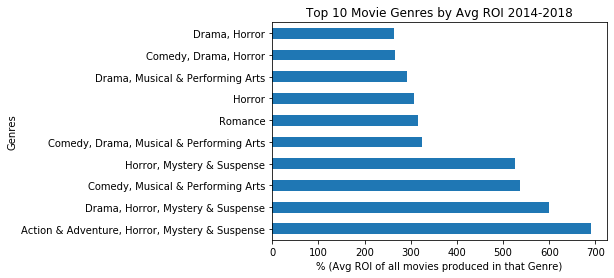

In [160]:
#Create bar graph to visualize df
MoviesTop5GensL5yrs_df.plot(kind='barh', y= 'ROI %', legend =None)

plt.title('Top 10 Movie Genres by Avg ROI 2014-2018')
plt.ylabel('Genres')
plt.xlabel ('% (Avg ROI of all movies produced in that Genre)')


plt.savefig('Genre_Aoutput/'+ 'L5yrstop10genresROI.png', bbox_inches='tight')

##  Build for Line graph using  Top 5 genres with Highest ROI AVG from 2018-2014

In [106]:
#brought in df and viewed
Movieslast5years_df.head ()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI %
1817,THE LEGEND OF HERCULES,70000000,18848538,2014,3,33.0,99.0,"Action & Adventure, Science Fiction & Fantasy",PG-13,-73.073517
1818,RIDE ALONG,25000000,134202565,2014,18,58.0,99.0,"Action & Adventure, Comedy",PG-13,436.810260
1819,THE NUT JOB,30000000,64251538,2014,12,43.0,86.0,"Animation, Comedy",PG,114.171793
1820,JACK RYAN: SHADOW RECRUIT,60000000,50577412,2014,55,53.0,105.0,"Action & Adventure, Drama, Mystery & Suspense",PG-13,-15.704313
1822,"I, FRANKENSTEIN",65000000,19075290,2014,5,38.0,92.0,"Horror, Mystery & Suspense, Science Fiction & ...",PG-13,-70.653400


In [107]:
#create new pivot with year grouping and roi sorted by Genres
MoviesGerebyYrpivotROI= Movieslast5years_df.pivot_table(index=['Year'], columns=['Genre'], aggfunc='mean', values=['ROI %'])

#view new pivot
MoviesGerebyYrpivotROI.head ()

ROI %                                        \
Genre Action & Adventure Action & Adventure, Animation, Comedy   
Year                                                             
2014           73.148830                                   NaN   
2015           -3.469511                                   NaN   
2016           20.111939                             61.151913   
2017                 NaN                                   NaN   
2018            3.167880                                   NaN   

                                                            \
Genre Action & Adventure, Animation, Comedy, Kids & Family   
Year                                                         
2014                                          153.271091     
2015                                          -33.824129     
2016                                                 NaN     
2017                                           57.114832     
2018                                           35.937105     

                                                                                       \
Genre Action & Adventure, Animation, Comedy, Kids & Family, Science Fiction & Fantasy   
Year                                                                                    
2014                                          -15.271158                                
2015                                           36.459623                                
2016                                                 NaN                                
2017                                                 NaN                                
2018                                                 NaN                                

                                                    \
Genre Action & Adventure, Animation, Kids & Family   
Year                                                 
2014                                           NaN   
2015                                           NaN   
2016                                     65.838029   
2017                                           NaN   
2018                                    201.096616   

                                                                               \
Genre Action & Adventure, Animation, Kids & Family, Science Fiction & Fantasy   
Year                                                                            
2014                                           22.070982                        
2015                                                 NaN                        
2016                                                 NaN                        
2017                                                 NaN                        
2018                                          111.303550                        

                                                                \
Genre Action & Adventure, Animation, Science Fiction & Fantasy   
Year                                                             
2014                                                 NaN         
2015                                                 NaN         
2016                                          -12.685295         
2017                                                 NaN         
2018                                                 NaN         

                                                                    \
Genre Action & Adventure, Comedy Action & Adventure, Comedy, Drama   
Year                                                                 
2014                  273.974461                               NaN   
2015                   -0.500566                               NaN   
2016                  106.439158                               NaN   
2017                   38.633382                        -25.599392   
2018                  147.697920                               NaN   

                                                 ...                \
Genre Action & Adventure, Comedy, Kids

In [113]:
#Create Dataframe from pivot table
MoviesL5yrsbygenre_df = MoviesGerebyYrpivotROI

#view new dataframe 
MoviesL5yrsbygenre_df.head ()

ROI %                                        \
Genre Action & Adventure Action & Adventure, Animation, Comedy   
Year                                                             
2014           73.148830                                   NaN   
2015           -3.469511                                   NaN   
2016           20.111939                             61.151913   
2017                 NaN                                   NaN   
2018            3.167880                                   NaN   

                                                            \
Genre Action & Adventure, Animation, Comedy, Kids & Family   
Year                                                         
2014                                          153.271091     
2015                                          -33.824129     
2016                                                 NaN     
2017                                           57.114832     
2018                                           35.937105     

                                                                                       \
Genre Action & Adventure, Animation, Comedy, Kids & Family, Science Fiction & Fantasy   
Year                                                                                    
2014                                          -15.271158                                
2015                                           36.459623                                
2016                                                 NaN                                
2017                                                 NaN                                
2018                                                 NaN                                

                                                    \
Genre Action & Adventure, Animation, Kids & Family   
Year                                                 
2014                                           NaN   
2015                                           NaN   
2016                                     65.838029   
2017                                           NaN   
2018                                    201.096616   

                                                                               \
Genre Action & Adventure, Animation, Kids & Family, Science Fiction & Fantasy   
Year                                                                            
2014                                           22.070982                        
2015                                                 NaN                        
2016                                                 NaN                        
2017                                                 NaN                        
2018                                          111.303550                        

                                                                \
Genre Action & Adventure, Animation, Science Fiction & Fantasy   
Year                                                             
2014                                                 NaN         
2015                                                 NaN         
2016                                          -12.685295         
2017                                                 NaN         
2018                                                 NaN         

                                                                    \
Genre Action & Adventure, Comedy Action & Adventure, Comedy, Drama   
Year                                                                 
2014                  273.974461                               NaN   
2015                   -0.500566                               NaN   
2016                  106.439158                               NaN   
2017                   38.633382                        -25.599392   
2018                  147.697920                               NaN   

                                                 ...                \
Genre Action & Adventure, Comedy, Kids

In [123]:

# get a list of all the column names from top 10 Genres
indexNamesArr = MoviesTop5GensL5yrs_df.index.values
    
# convert ndarray to list
listOfRowIndexLabels = list(indexNamesArr)
    

print("List Of Row Index Labels" , listOfRowIndexLabels, sep='\n')


List Of Row Index Labels
['Action & Adventure, Horror, Mystery & Suspense', 'Drama, Horror, Mystery & Suspense', 'Comedy, Musical & Performing Arts', 'Horror, Mystery & Suspense', 'Comedy, Drama, Musical & Performing Arts', 'Romance', 'Horror', 'Drama, Musical & Performing Arts', 'Comedy, Drama, Horror', 'Drama, Horror']


In [130]:
#create df with only top highest avg roi from 2018-2014
topmoviesG = MoviesL5yrsbygenre_df.loc[:,MoviesL5yrsbygenre_df.columns.get_level_values("Genre").isin(
    {'Action & Adventure, Horror, Mystery & Suspense', 'Drama, Horror, Mystery & Suspense', 'Comedy, Musical & Performing Arts', 'Horror, Mystery & Suspense', 'Comedy, Drama, Musical & Performing Arts', 'Romance', 'Horror', 'Drama, Musical & Performing Arts', 'Comedy, Drama, Horror', 'Drama, Horror'})]    
    
#filled nans with zero
topmoviesG.fillna(0, inplace=True)

#view new df
topmoviesG

ROI %                        \
Genre Action & Adventure, Horror, Mystery & Suspense Comedy, Drama, Horror   
Year                                                                         
2014                                          0.0000              0.000000   
2015                                          0.0000              0.000000   
2016                                        690.4244            266.031715   
2017                                          0.0000              0.000000   
2018                                          0.0000              0.000000   

                                                \
Genre Comedy, Drama, Musical & Performing Arts   
Year                                             
2014                                  0.000000   
2015                                  0.000000   
2016                                324.967904   
2017                                  0.000000   
2018                                  0.000000   

                                                       \
Genre Comedy, Musical & Performing Arts Drama, Horror   
Year                                                    
2014                           0.000000      0.000000   
2015                         535.504241      0.000000   
2016                           0.000000    181.709320   
2017                           0.000000    290.771688   
2018                           0.000000    340.694560   

                                                                          \
Genre Drama, Horror, Mystery & Suspense Drama, Musical & Performing Arts   
Year                                                                       
2014                           0.000000                         0.000000   
2015                           0.000000                       475.706375   
2016                           0.000000                         0.000000   
2017                         397.497742                       107.547826   
2018                        1006.025653                         0.000000   

                                                          
Genre      Horror Horror, Mystery & Suspense     Romance  
Year                                                      
2014     0.000000                   0.000000    0.000000  
2015   143.238514                   0.000000  315.418075  
2016   131.972815                 525.187155    0.000000  
2017    19.179208                   0.000000    0.000000  
2018   628.982937                   0.000000    0.000000

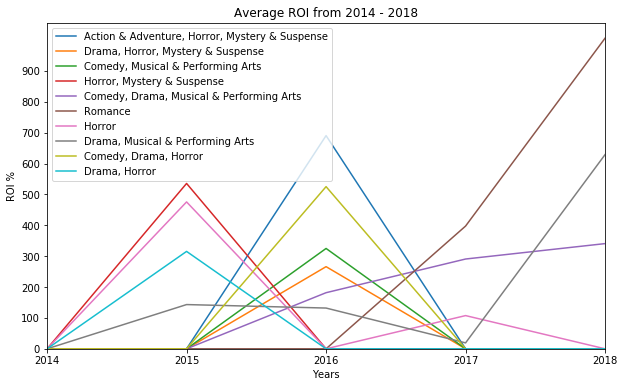

In [131]:
#create line graph to visulize the df

topmoviesG.plot(kind = 'line', figsize=(10, 6)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#rename the labels
plt.legend( loc='best', 
           labels = ['Action & Adventure, Horror, Mystery & Suspense', 'Drama, Horror, Mystery & Suspense', 'Comedy, Musical & Performing Arts', 'Horror, Mystery & Suspense', 'Comedy, Drama, Musical & Performing Arts', 'Romance', 'Horror', 'Drama, Musical & Performing Arts', 'Comedy, Drama, Horror', 'Drama, Horror'])

#style


plt.title("Average ROI from 2014 - 2018")
plt.xlabel("Years")
plt.ylabel("ROI %")
plt.ylim(0)
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(2014,2019,1))


#save
plt.savefig('Genre_Aoutput/'+ 'Genreslinegraph.png', bbox_inches='tight')


# Close-up line graph of genres with movies produced in more than just one year


In [157]:
topmoviesGC = MoviesL5yrsbygenre_df.loc[:,MoviesL5yrsbygenre_df.columns.get_level_values("Genre").isin(
    {'Action & Adventure, Horror, Mystery & Suspense', 'Drama, Horror, Mystery & Suspense', 'Comedy, Musical & Performing Arts', 'Horror, Mystery & Suspense', 'Comedy, Drama, Musical & Performing Arts', 'Romance', 'Horror', 'Drama, Musical & Performing Arts', 'Comedy, Drama, Horror', 'Drama, Horror'})]        
        

#view new df
topmoviesGC

ROI %                        \
Genre Action & Adventure, Horror, Mystery & Suspense Comedy, Drama, Horror   
Year                                                                         
2014                                             NaN                   NaN   
2015                                             NaN                   NaN   
2016                                        690.4244            266.031715   
2017                                             NaN                   NaN   
2018                                             NaN                   NaN   

                                                \
Genre Comedy, Drama, Musical & Performing Arts   
Year                                             
2014                                       NaN   
2015                                       NaN   
2016                                324.967904   
2017                                       NaN   
2018                                       NaN   

                                                       \
Genre Comedy, Musical & Performing Arts Drama, Horror   
Year                                                    
2014                                NaN           NaN   
2015                         535.504241           NaN   
2016                                NaN    181.709320   
2017                                NaN    290.771688   
2018                                NaN    340.694560   

                                                                          \
Genre Drama, Horror, Mystery & Suspense Drama, Musical & Performing Arts   
Year                                                                       
2014                                NaN                              NaN   
2015                                NaN                       475.706375   
2016                                NaN                              NaN   
2017                         397.497742                       107.547826   
2018                        1006.025653                              NaN   

                                                          
Genre      Horror Horror, Mystery & Suspense     Romance  
Year                                                      
2014          NaN                        NaN         NaN  
2015   143.238514                        NaN  315.418075  
2016   131.972815                 525.187155         NaN  
2017    19.179208                        NaN         NaN  
2018   628.982937                        NaN         NaN

In [158]:
#isolate genres with movies in produce in more than just one year
topmovies4closeup =MoviesL5yrsbygenre_df.loc[:,MoviesL5yrsbygenre_df.columns.get_level_values("Genre").isin(
    {'Drama, Horror, Mystery & Suspense',  'Horror', 'Drama, Musical & Performing Arts','Drama, Horror'})]     

#veiew df
topmovies4closeup        

ROI %                                    \
Genre Drama, Horror Drama, Horror, Mystery & Suspense   
Year                                                    
2014            NaN                               NaN   
2015            NaN                               NaN   
2016     181.709320                               NaN   
2017     290.771688                        397.497742   
2018     340.694560                       1006.025653   

                                                    
Genre Drama, Musical & Performing Arts      Horror  
Year                                                
2014                               NaN         NaN  
2015                        475.706375  143.238514  
2016                               NaN  131.972815  
2017                        107.547826   19.179208  
2018                               NaN  628.982937

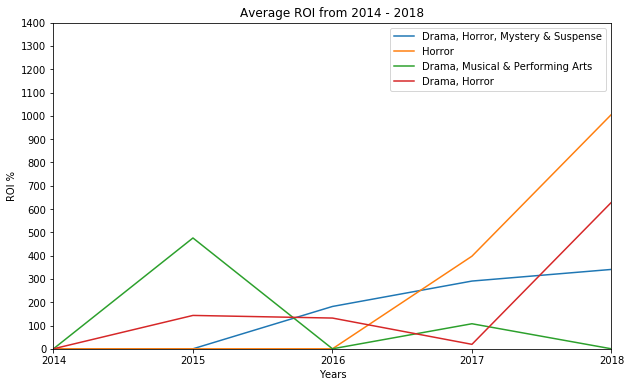

In [159]:

#fill nans with zero
topmovies4closeup.fillna(0, inplace=True)

#create line graph to visulize the df

topmovies4closeup.plot(kind = 'line', figsize=(10, 6)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#rename the labels
plt.legend( loc='best', labels = ['Drama, Horror, Mystery & Suspense',  'Horror', 'Drama, Musical & Performing Arts','Drama, Horror'])

#style


plt.title("Average ROI from 2014 - 2018")
plt.xlabel("Years")
plt.ylabel("ROI %")
plt.ylim(0)
plt.yticks(np.arange(0, 1500, 100))
plt.xticks(np.arange(2014,2019,1))


#save
plt.savefig('Genre_Aoutput/'+ 'Genreslinecloseupgraph.png', bbox_inches='tight')



# Analysis -
      Tell ya later